In [ ]:
#Titanic: Machine Learning from Disaster
#Author: Nick Bohall
#Source: https://www.kaggle.com/c/titanic
#Date: 8/24/

In [63]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
#Read in the test data set
df_train = pd.read_csv("Z:/Coding/Myproj/Kaggle/Titanic/titanic/train.csv")
df_test = pd.read_csv("Z:/Coding/Myproj/Kaggle/Titanic/titanic/test.csv")
combine = [df_train, df_test]

In [65]:
#Making the columns lowercase
df_train.columns = df_train.columns.map(lambda x: str.lower(x))

In [66]:
#Checking Columns
print(df_train.columns.values)

['passengerid' 'survived' 'pclass' 'name' 'sex' 'age' 'sibsp' 'parch'
 'ticket' 'fare' 'cabin' 'embarked']


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
df_train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
#Quick analysis of the correlation between class and survived
df_train[['pclass', 'survived']].groupby(['pclass'], as_index = True).mean().sort_values(by = 'survived', ascending = False)

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [89]:
df_train[['sex', 'survived']].groupby(['sex'], as_index = True).mean().sort_values(by = 'survived', ascending = False)

,survived
sex,
female,0.742038
male,0.188908


In [90]:
df_train[['sibsp', 'survived']].groupby(['sibsp'], as_index = True).mean().sort_values(by = 'survived', ascending = False)

,survived
sibsp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [91]:
df_train[['parch', 'survived']].groupby(['parch'], as_index = True).mean().sort_values(by = 'survived', ascending = False)

,survived
parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


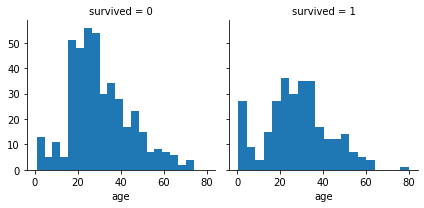

In [95]:
#checking Age
g = sns.FacetGrid(df_train, col = 'survived')
g.map(plt.hist, 'age', bins = 20)

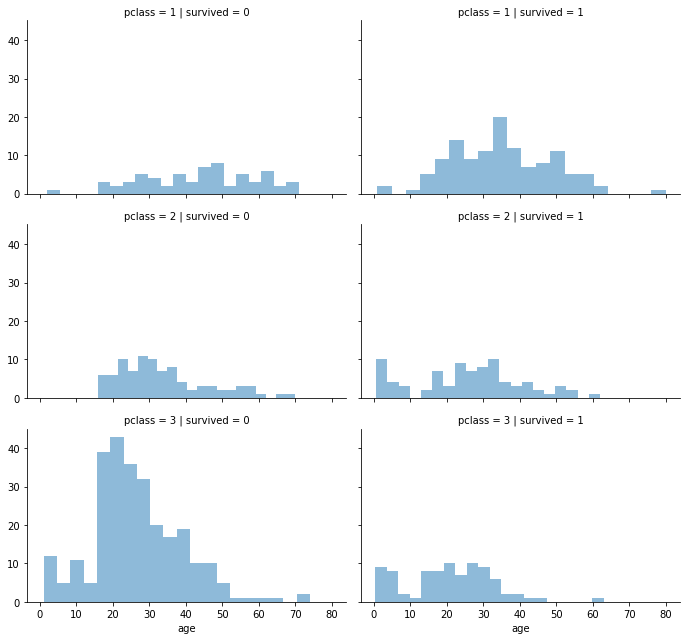

In [97]:
grid = sns.FacetGrid(df_train, col = 'survived', row = 'pclass', size = 3, aspect = 1.6)
grid.map(plt.hist, 'age', alpha = 0.5, bins = 20)
grid.add_legend()

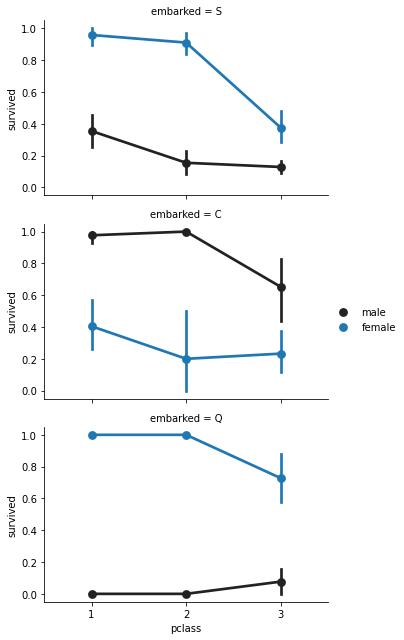

In [99]:
grid = sns.FacetGrid(df_train, row = 'embarked', size = 3, aspect = 1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', pallette = 'deep')
grid.add_legend()